# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values="?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [17]:
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [18]:
print(data.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


###După analiza variabilelor, am decis că variabilele finale vor fi: age, workclass, education-num, relationship, race, sex, hours-per-week și income. Acestea vor fi recodificate utilizând tehnica one-hot encoding pentru a le transforma într-o formă numerică. Ulterior, vor fi aplicate mai multe operațiuni de curățare a datelor, după ce vor fi eliminate variabilele care nu sunt relevante pentru analiză, astfel încât să minimizăm eliminarea datelor esențiale. De exemplu, variabila native-country are 583 de valori lipsă, dar în unele cazuri aceasta este singura valoare lipsă pentru o înregistrare. Dacă am elimina aceste valori lipsă acum, am risca să pierdem informații utile pentru o variabilă care nu este folosită în model.

In [20]:
# Detect duplicate rows
duplicates = data[data.duplicated()]
print(data.duplicated().sum())

24


In [23]:
# Remove duplicates
data_clean = data.drop_duplicates()
data_clean

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32537 rows x 15 columns]

In [24]:
data_clean = data_clean.dropna(subset=["workclass"])

In [25]:
data_clean.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          7
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    555
income              0
dtype: int64

In [26]:
capital_gain=(data["capital-gain"] > 0).value_counts()
capital_gain

capital-gain
False    29849
True      2712
Name: count, dtype: int64

##### O sa iau variabilele ordinale si o sa vad ce fel de raspunsuri au ca sa imi fac o idee de cum arata cum as putea sa le encodez si pe care as putea sa le pastrez astfel incat sa fie relevante pentru modelul meu.Tot odata tabelul describe de mai sus imi arata ca variabilele capital-gain	capital-loss au foarte multe valori de 0, o abatere standard foarte mare de 7385 respectiv 402 fapt care ma face sa ma gandesc ca ar ajuta sa nu le implic in model

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [28]:
df_encoded = data_clean.drop(columns=["fnlwgt", "education", "capital-loss", "capital-gain", "native-country","marital-status", "occupation"])

In [31]:
df_encoded.value_counts

<bound method DataFrame.value_counts of        age         workclass  education-num   relationship   race     sex  \
0       39         State-gov             13  Not-in-family  White    Male   
1       50  Self-emp-not-inc             13        Husband  White    Male   
2       38           Private              9  Not-in-family  White    Male   
3       53           Private              7        Husband  Black    Male   
4       28           Private             13           Wife  Black  Female   
...    ...               ...            ...            ...    ...     ...   
32556   27           Private             12           Wife  White  Female   
32557   40           Private              9        Husband  White    Male   
32558   58           Private              9      Unmarried  White  Female   
32559   22           Private              9      Own-child  White    Male   
32560   52      Self-emp-inc              9           Wife  White  Female   

       hours-per-week income  
0   

In [32]:
df_encoded.head()

age         workclass  education-num   relationship   race     sex  \
0   39         State-gov             13  Not-in-family  White    Male   
1   50  Self-emp-not-inc             13        Husband  White    Male   
2   38           Private              9  Not-in-family  White    Male   
3   53           Private              7        Husband  Black    Male   
4   28           Private             13           Wife  Black  Female   

   hours-per-week income  
0              40  <=50K  
1              13  <=50K  
2              40  <=50K  
3              40  <=50K  
4              40  <=50K

In [35]:
df_encoded["workclass"].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [36]:
df_encoded["relationship"].value_counts()

relationship
Husband           12698
Not-in-family      7853
Own-child          4526
Unmarried          3270
Wife               1436
Other-relative      918
Name: count, dtype: int64

In [47]:
data["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [37]:
df_encoded["race"].value_counts()

race
White                 26285
Black                  2909
Asian-Pac-Islander      973
Amer-Indian-Eskimo      286
Other                   248
Name: count, dtype: int64

In [39]:
df_encoded.isna().sum()

age               0
workclass         0
education-num     0
relationship      0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [40]:
df_encoded = pd.get_dummies(df_encoded, columns=["income", "sex","workclass","relationship", "race"], prefix=["income", "sex", "workclass","relationship", "race"], drop_first=True)

df_encoded["income_>50K"] = df_encoded["income_>50K"].astype(int)
df_encoded["sex_Male"] = df_encoded["sex_Male"].astype(int)
df_encoded.head()

age  education-num  hours-per-week  income_>50K  sex_Male  \
0   39             13              40            0         1   
1   50             13              13            0         1   
2   38              9              40            0         1   
3   53              7              40            0         1   
4   28             13              40            0         0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0                   False                       False  ...   
1                   False                        True  ...   
2                   False                       False  ...   
3                   False                       False  ...   
4                   False                       False  ...   

   workclass_Without-pay  relationship_Not-in-family  \
0                  False                        True   
1                  False                       False   
2                  False                        True   
3                  False                       False   
4                  False                       False   

   relationship_Other-relative  relationship_Own-child  \
0                        False                   False   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                   False              False                    False   
1                   False              False                    False   
2                   False              False                    False   
3                   False              False                    False   
4                   False               True                    False   

   race_Black  race_Other  race_White  
0       False       False        True  
1       False       False        True  
2       False       False        True  
3        True       False       False  
4        True       False       False  

[5 rows x 21 columns]

In [42]:
df_encoded.columns

Index(['age', 'education-num', 'hours-per-week', 'income_>50K', 'sex_Male',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'],
      dtype='object')

In [46]:
df_encoded[['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
'workclass_Self-emp-not-inc', 'workclass_State-gov',
'workclass_Without-pay', 'relationship_Not-in-family',
'relationship_Other-relative', 'relationship_Own-child',
'relationship_Unmarried', 'relationship_Wife',
'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White']] = df_encoded[['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
'workclass_Self-emp-not-inc', 'workclass_State-gov',
'workclass_Without-pay', 'relationship_Not-in-family',
'relationship_Other-relative', 'relationship_Own-child',
'relationship_Unmarried', 'relationship_Wife',
'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'
]].astype(int)
df_encoded.head()

age  education-num  hours-per-week  income_>50K  sex_Male  \
0   39             13              40            0         1   
1   50             13              13            0         1   
2   38              9              40            0         1   
3   53              7              40            0         1   
4   28             13              40            0         0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  1   
3                    0                       0                  1   
4                    0                       0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0                       0                           0  ...   
1                       0                           1  ...   
2                       0                           0  ...   
3                       0                           0  ...   
4                       0                           0  ...   

   workclass_Without-pay  relationship_Not-in-family  \
0                      0                           1   
1                      0                           0   
2                      0                           1   
3                      0                           0   
4                      0                           0   

   relationship_Other-relative  relationship_Own-child  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  0                        0   
3                       0                  0                        0   
4                       0                  1                        0   

   race_Black  race_Other  race_White  
0           0           0           1  
1           0           0           1  
2           0           0           1  
3           1           0           0  
4           1           0           0  

[5 rows x 21 columns]

In [47]:
from sklearn.preprocessing import LabelEncoder
data_1=data_clean

encoder = LabelEncoder()
data_1["workclass_encoded"] = encoder.fit_transform(data_1["workclass"]) +1

data_1[["workclass", "workclass_encoded"]].value_counts()

C:\Users\maria\AppData\Local\Temp\ipykernel_9324\2812152897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["workclass_encoded"] = encoder.fit_transform(data_1["workclass"]) +1


workclass         workclass_encoded
Private           4                    22673
Self-emp-not-inc  6                     2540
Local-gov         2                     2093
State-gov         7                     1298
Self-emp-inc      5                     1116
Federal-gov       1                      960
Without-pay       8                       14
Never-worked      3                        7
Name: count, dtype: int64

In [48]:
encoder = LabelEncoder()
data_1["occupation_encoded"] = encoder.fit_transform(data_1["occupation"]) +1
data_1[["occupation", "occupation_encoded"]].value_counts()

C:\Users\maria\AppData\Local\Temp\ipykernel_9324\3149715025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["occupation_encoded"] = encoder.fit_transform(data_1["occupation"]) +1


occupation         occupation_encoded
Prof-specialty     10                    4136
Craft-repair       3                     4094
Exec-managerial    4                     4065
Adm-clerical       1                     3768
Sales              12                    3650
Other-service      8                     3291
Machine-op-inspct  7                     2000
Transport-moving   14                    1597
Handlers-cleaners  6                     1369
Farming-fishing    5                      992
Tech-support       13                     927
Protective-serv    11                     649
Priv-house-serv    9                      147
Armed-Forces       2                        9
Name: count, dtype: int64

In [49]:
correlation_value = data_1["occupation_encoded"].corr(data_1["workclass_encoded"])
print(correlation_value)

0.010727680800509962


####Am realizat acest test de corelație pentru a evalua relația dintre cele două variabile. Valoarea corelației de 0.01(cu datele curatate ) indică o asociere slabă, ceea ce sugerează că cele două variabile nu sunt foarte strâns legate. Acest rezultat arată că variabilele nu transmit exact aceeași informație și nu există un risc semnificativ de colinearitate. Prin urmare, ambele variabile ar putea fi incluse în model fără a afecta negativ performanța acestuia.

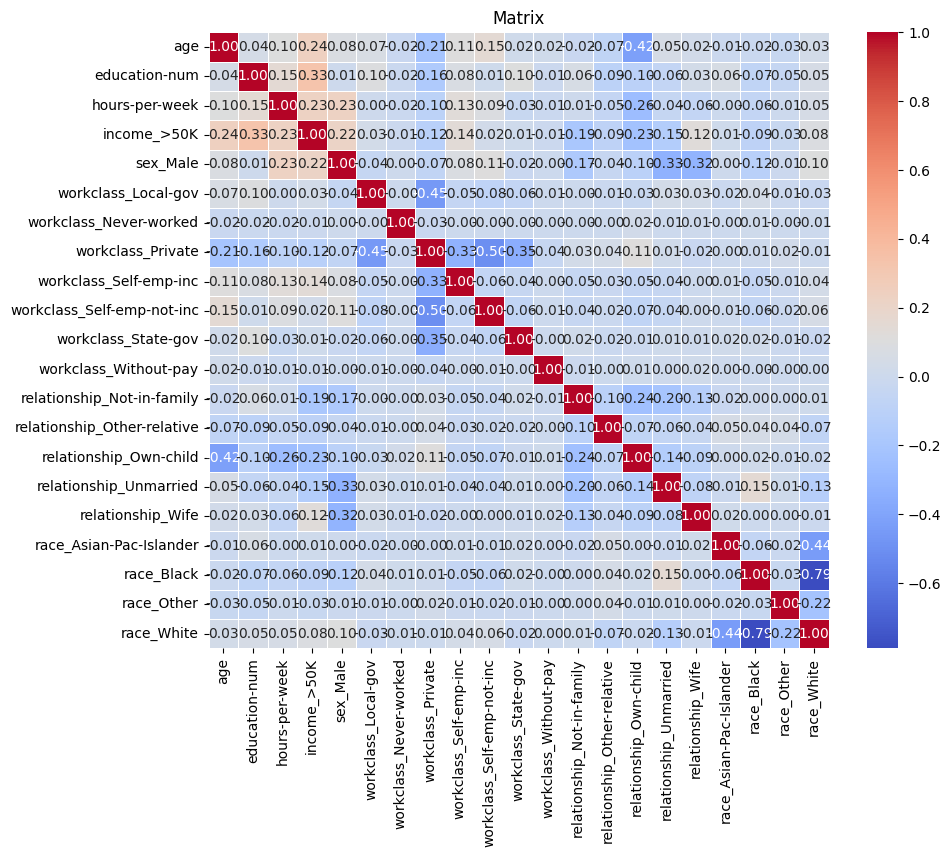

In [50]:
correlation_matrix = df_encoded.corr()

# Creăm heatmap-ul
plt.figure(figsize=(10, 8))  # Dimensiunea figurii
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titlu
plt.title("Matrix")
plt.show()

#####Nu am vrut sa pastrez toate variabilele in model, in special in momentul in care consideram ca unele din ele se refera mai mult sau mai putin la acelasi lucru si am ales renunt la ele pentru a usura modelul, acesta a fost cazul pentru variabile precum "marital-status", "occupation", "education", sau "native-country". 

In [57]:
from sklearn.model_selection import train_test_split

# Definirea variabilelor independente (X) și a target-ului (y)
X = df_encoded.drop("hours-per-week", axis=1)  # Fără coloana target
y = df_encoded["hours-per-week"]               # Coloana target

# Împărțirea datelor în 75% train și 25% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Verificăm dimensiunile seturilor
print("Set de antrenare:", X_train.shape)
print("Set de testare:", X_test.shape)

Set de antrenare: (23025, 20)
Set de testare: (7676, 20)


In [69]:
print(y_train)
print(y_test)

16758    40
16529    38
8875     40
27752    40
28046    40
         ..
31595    40
5763     30
918      30
16741    35
25075    50
Name: hours-per-week, Length: 23025, dtype: int64
20134    40
8253     35
4906     50
20338    30
9341     10
         ..
20871    41
1856     60
3964     55
25448    35
25525    40
Name: hours-per-week, Length: 7676, dtype: int64


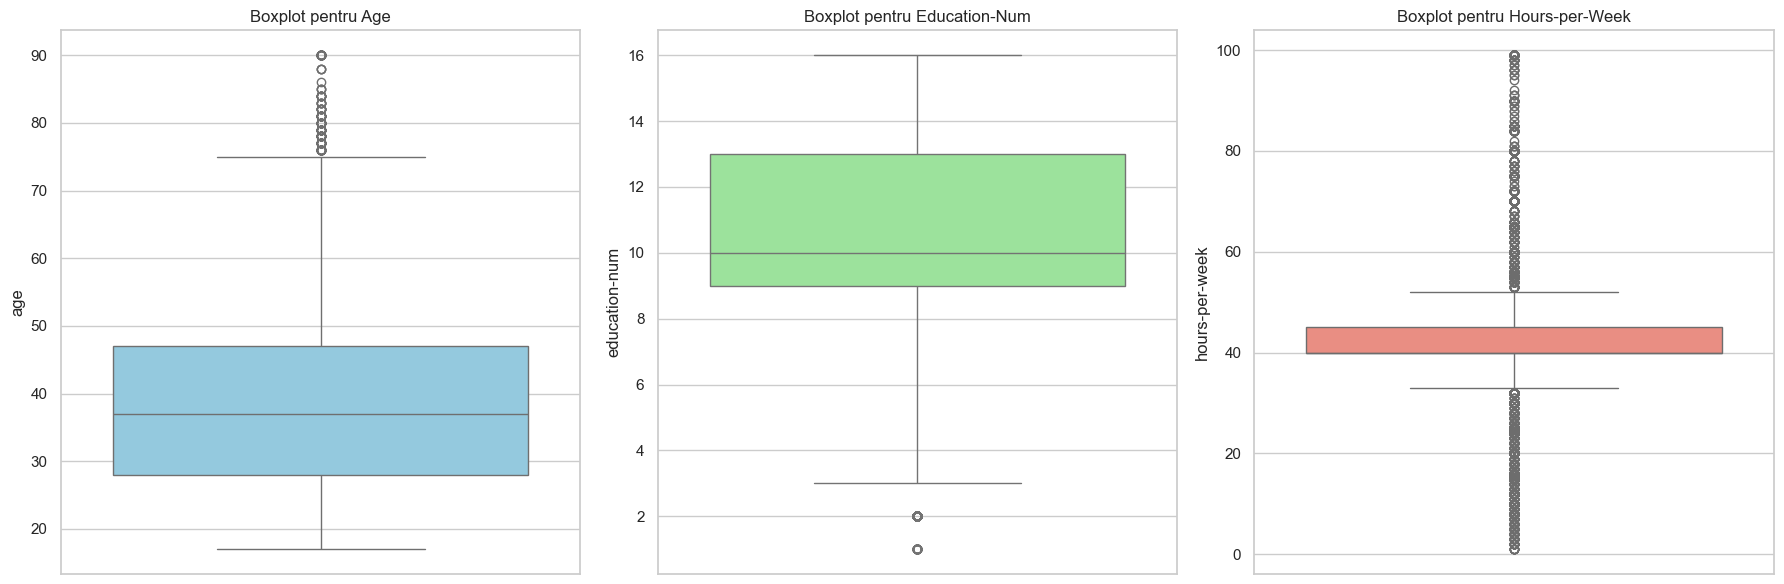

In [56]:
plt.figure(figsize=(18, 6))  # Ajustăm dimensiunea pentru 3 grafice

# Boxplot pentru 'age'
plt.subplot(1, 3, 1)  # 1 rând, 3 coloane, primul grafic
sns.boxplot(y=df_encoded['age'], color='skyblue')
plt.title('Boxplot pentru Age')

# Boxplot pentru 'education-num'
plt.subplot(1, 3, 2)  # al doilea grafic
sns.boxplot(y=df_encoded['education-num'], color='lightgreen')
plt.title('Boxplot pentru Education-Num')

# Boxplot pentru 'hours-per-week'
plt.subplot(1, 3, 3)  # al treilea grafic
sns.boxplot(y=df_encoded['hours-per-week'], color='salmon')
plt.title('Boxplot pentru Hours-per-Week')

plt.tight_layout()
plt.show()

###Din acest box plot putem observa ca avem oulieri pt ambele variabile numerice si acestia trebuie sa fie eliminati. Pentru asta am ales sa scalez datele. voi folosi standard scaler si scorurile z pentru variabila age pentru a are putini outlieri distributia variabilei fiind una destul de normala. Iar pentru variabila education-num voi folosi min max scaler pentru că valorile sunt deja într-un interval restrâns și discret.

In [58]:
from sklearn.preprocessing import StandardScaler

# Inițializarea scaler-ului
scaler = StandardScaler()

# Fit pe datele de TRAIN și transform
X_train['age_scaled'] = scaler.fit_transform(X_train[['age']])

# Transform pe datele de TEST (fără fit din nou)
X_test['age_scaled'] = scaler.transform(X_test[['age']])


In [61]:
from sklearn.preprocessing import MinMaxScaler

# Inițializarea scaler-ului
scaler = MinMaxScaler()

# Fit pe setul de TRAIN și transformare
X_train['education_num_scaled'] = scaler.fit_transform(X_train[['education-num']])

# Doar transform pe setul de TEST folosind coloana originală
X_test['education_num_scaled'] = scaler.transform(X_test[['education-num']])


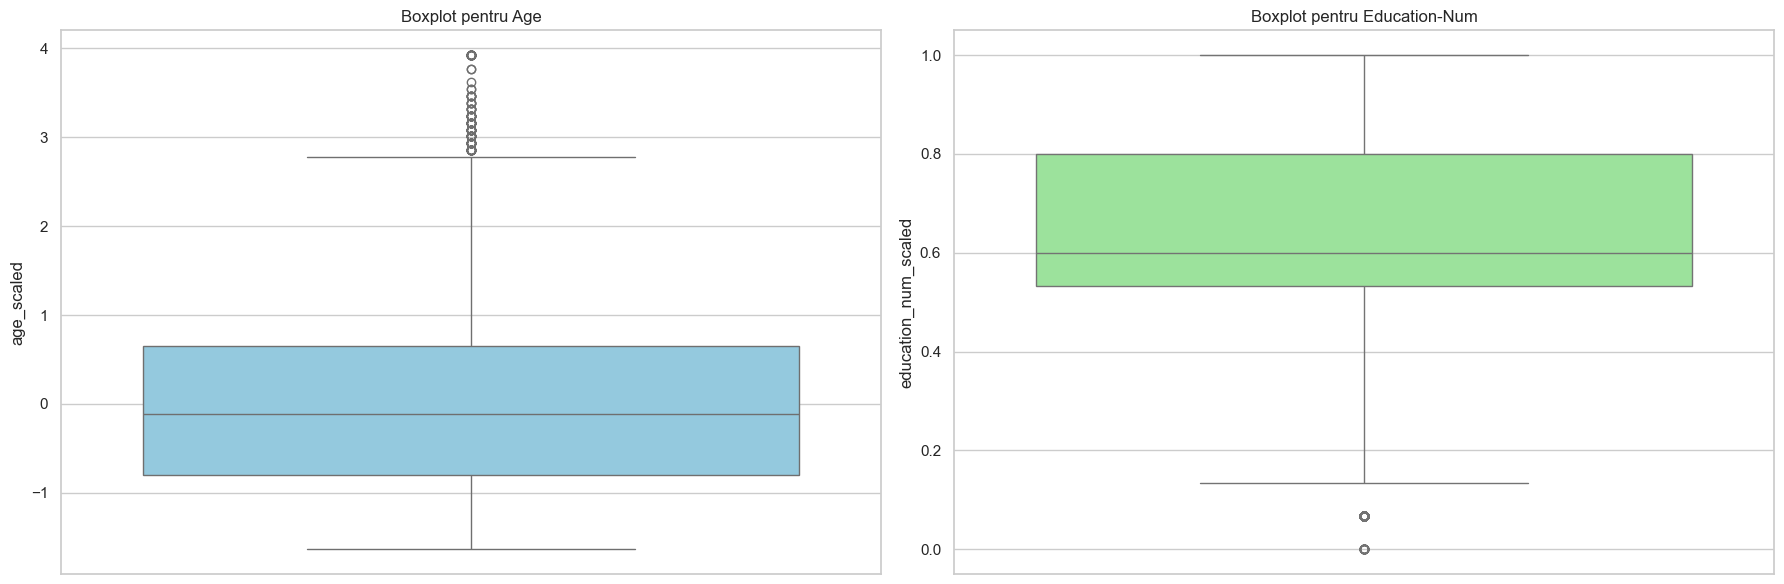

In [63]:
plt.figure(figsize=(18, 6))  # Ajustăm dimensiunea pentru 3 grafice

# Boxplot pentru 'age'
plt.subplot(1,2, 1)  # 1 rând, 3 coloane, primul grafic
sns.boxplot(y=X_train['age_scaled'], color='skyblue')
plt.title('Boxplot pentru Age')

# Boxplot pentru 'education-num'
plt.subplot(1,2, 2)  # al doilea grafic
sns.boxplot(y=X_train['education_num_scaled'], color='lightgreen')
plt.title('Boxplot pentru Education-Num')



plt.tight_layout()
plt.show()

####După aplicarea standardizării, am observat că în continuare există outlieri care pot influența negativ performanța modelului de machine learning. Deși acești outlieri sunt puțini și localizați la extremele distribuției, am considerat că este important să reduc impactul lor fără a pierde informații valoroase.
Pentru a gestiona această situație, am utilizat metoda Winsorizare, care constă în limitarea valorilor extreme la un prag stabilit, în loc să elimin datele respective. Astfel, am ajustat doar valorile care depășesc acest prag, păstrând toate observațiile în setul de date.Am ales să limitez 1% din datele de la fiecare capăt al distribuției (în total 2% din date).
Prin această metodă, am creat noi coloane în care valorile extreme au fost înlocuite cu pragurile superioare și inferioare stabilite. Astfel, am obținut o distribuție mai stabilă, cu mai puține valori extreme care ar putea distorsiona rezultatele modelului.


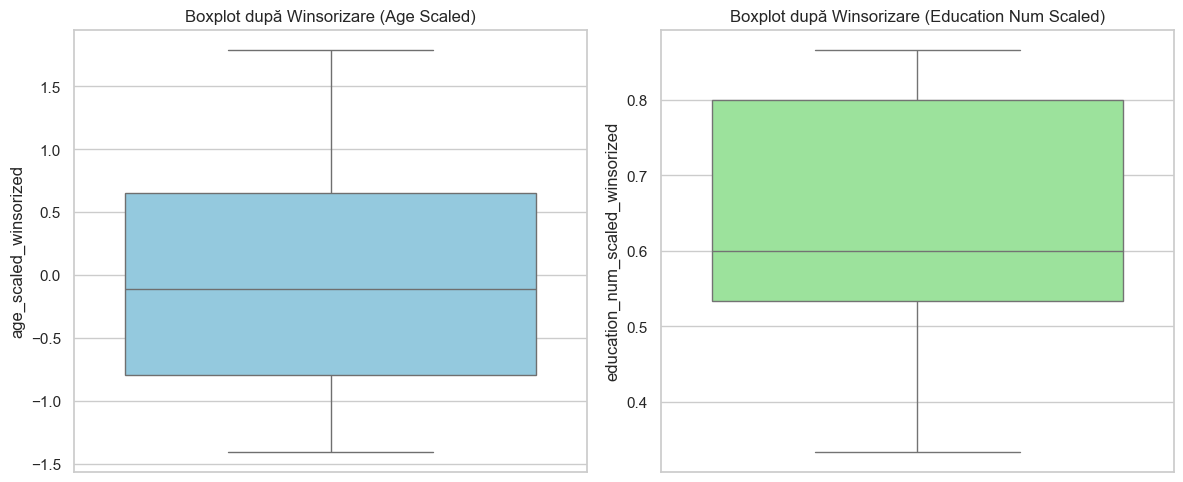

In [ ]:
from scipy.stats.mstats import winsorize


# Winsorizare pentru age_scaled (5% la ambele capete)
X_train['age_scaled_winsorized'] = winsorize(X_train['age_scaled'], limits=[0.01, 0.01])

# Winsorizare pentru education_num_scaled (5% la ambele capete)
X_train['education_num_scaled_winsorized'] = winsorize(X_train['education_num_scaled'], limits=[0.01, 0.01])

# Vizualizare boxplot pentru ambele variabile
plt.figure(figsize=(12, 5))

# Boxplot pentru age_scaled_winsorized
plt.subplot(1, 2, 1)
sns.boxplot(y=X_train['age_scaled_winsorized'], color='skyblue')
plt.title('Boxplot după Winsorizare (Age Scaled)')

# Boxplot pentru education_num_scaled_winsorized
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['education_num_scaled_winsorized'], color='lightgreen')
plt.title('Boxplot după Winsorizare (Education Num Scaled)')

plt.tight_layout()  # Ajustare layout pentru a evita suprapunerile
plt.show()


In [70]:
df_encoded.to_csv('data.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
data_clean.to_csv('data_clean.csv', index=False)
y_test.to_csv('Y_test.csv', index=False)
y_train.to_csv('Y_train.csv', index=False)